In [24]:
# extract data from kaggle 
!pip install kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [25]:
import json
token = {"username":"sifanzhu","key":"7d5ff1d4a014fea1778bb07fb530b524"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token, file)

In [26]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v /content

- path is now set to: /content


In [27]:
!kaggle datasets download -d dgawlik/nyse

nyse.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
!unzip -uq "/content/datasets/dgawlik/nyse/nyse.zip" -d "/content/datasets"

In [29]:
import numpy as np
import pandas as pd
# database display
df_prices = pd.read_csv('/content/datasets/prices.csv')

df_prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [30]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [31]:
# extract the unique symble from the database
df_prices['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [32]:
# NFLX is the company to predict the price
df_nflx = df_prices[df_prices['symbol']=='NFLX']
df_nflx.head()

,date,symbol,open,close,low,high,volume
555,2010-01-04,NFLX,55.519999,53.479999,52.960001,55.730000,17239600.0
1023,2010-01-05,NFLX,53.570001,51.510001,50.810001,53.599998,23753100.0
1491,2010-01-06,NFLX,51.530001,53.319999,50.380002,53.710001,23290400.0
1959,2010-01-07,NFLX,54.120000,52.400001,52.240001,54.300001,9955400.0
2427,2010-01-08,NFLX,52.490000,53.300002,52.260001,54.199999,8180900.0


In [33]:
df_nflx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 555 to 851088
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB


In [34]:
df_nflx.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,210.116464,210.245181,206.697548,213.541112,2.738426e+07
std,146.775428,146.810946,145.213453,148.225811,2.393048e+07
min,48.720000,49.130000,48.519999,50.249999,1.616300e+06
25%,97.222501,97.587502,95.787502,99.434999,1.347185e+07
50%,142.564999,142.340000,140.020000,143.749999,2.116330e+07
75%,317.847488,318.154992,311.419998,325.127508,3.294988e+07
max,708.900017,707.610001,697.569984,716.159996,3.155418e+08


Text(0, 0.5, 'price')

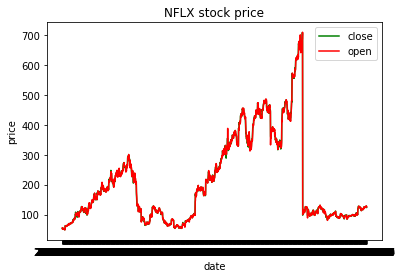

In [35]:
import matplotlib.pyplot as plt

# display the NFLX initial close and open price
plt.plot(df_nflx['date'], df_nflx['close'], color='g', label='close')
plt.plot(df_nflx['date'], df_nflx['open'], color='r', label='open')
plt.legend()

plt.title('NFLX stock price')
plt.xlabel('date')
plt.ylabel('price')

Text(0, 0.5, 'volume')

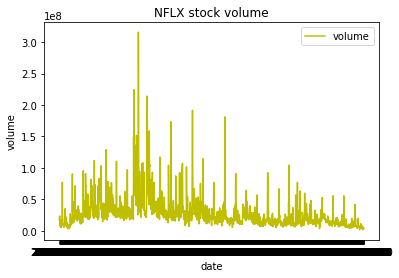

In [36]:
plt.plot(df_nflx['date'], df_nflx['volume'], color='y', label='volume')
plt.legend()

plt.title('NFLX stock volume')
plt.xlabel('date')
plt.ylabel('volume')

In [37]:
X = df_nflx['close']
date = df_nflx['date']

X.shape

(1762,)

## **DATA Preprocessing **

In [38]:


length=50
train_set = X.iloc[:1200].values.reshape(-1, 1)
test_set = X.iloc[1200:].values.reshape(-1, 1)

max_close = max(train_set)     #record the max num can transfer the normalized data into normal data 
min_close = min(test_set)

date_train_set = date.iloc[:1200].values
date_test_set = date.iloc[:1200].values
from sklearn.preprocessing import MinMaxScaler  

scaler = MinMaxScaler()

train_set = scaler.fit_transform(train_set)   #normalization 
test_set = scaler.transform(test_set)

print(max_close, min_close)
print(train_set[:5])
print(test_set[:5])


[484.389992] [82.790001]
[[0.00999402]
 [0.005468  ]
 [0.00962643]
 [0.00751275]
 [0.00958049]]
[[0.9476865 ]
 [0.92576849]
 [0.89475257]
 [0.91896805]
 [0.91775026]]


# Obtain training data 

In [39]:
X_train = []
y_train = []

# extract the training data 
# 1150 pieces of record 
for i in range(length, len(train_set)):
    X_train.append(train_set[i-length:i, :])
    y_train.append(train_set[i])

X_train, y_train = np.array(X_train), np.array(y_train)


X_train.shape, y_train.shape


((1150, 50, 1), (1150, 1))

# Testing Data Set

In [40]:
X_test = []
y_test = []
date_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set[i-length:i, :])
    y_test.append(test_set[i])
    date_test.append(date_test_set[i])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test.shape, y_test.shape, len(date_test)

((512, 50, 1), (512, 1), 512)

# Build up a GRU model


In [41]:
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Sequential
# three layers with 50 cells for the model with tanh activation function 
model = Sequential()
model.add(GRU(50, activation='tanh', recurrent_activation='sigmoid', input_shape = (X_train.shape[1],X_train.shape[2]), return_sequences=True))
model.add(GRU(50, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(GRU(50, activation='tanh', recurrent_activation='sigmoid'))
model.add(Dense(32,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,kernel_initializer='uniform', activation = 'linear'))
model.summary()
# model.compile(optimizer = 'adam', loss = 'mean_absolute_error')
# mean_absolute_error is applied to demostrate the outcome of the network
# adam optimizer 
model.compile(loss='mean_absolute_error', optimizer = 'adam' , metrics = ['mean_absolute_error'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 50, 50)            7950      
                                                                 
 gru_4 (GRU)                 (None, 50, 50)            15300     
                                                                 
 gru_5 (GRU)                 (None, 50)                15300     
                                                                 
 dense_2 (Dense)             (None, 32)                1632      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 40,215
Trainable params: 40,215
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 100, batch_size = 64)


Epoch 1/100
18/18 [==============================] - 8s 164ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - val_loss: 0.2859 - val_mean_absolute_error: 0.2859
Epoch 2/100
18/18 [==============================] - 2s 98ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - val_loss: 0.1382 - val_mean_absolute_error: 0.1382
Epoch 3/100
18/18 [==============================] - 2s 96ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - val_loss: 0.0649 - val_mean_absolute_error: 0.0649
Epoch 4/100
18/18 [==============================] - 2s 100ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - val_loss: 0.0509 - val_mean_absolute_error: 0.0509
Epoch 5/100
18/18 [==============================] - 2s 98ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - val_loss: 0.0465 - val_mean_absolute_error: 0.0465
Epoch 6/100
18/18 [==============================] - 2s 98ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - val_loss: 0.0427 - val_mean_absolute_error: 0.0427
Epoch 7/100
18

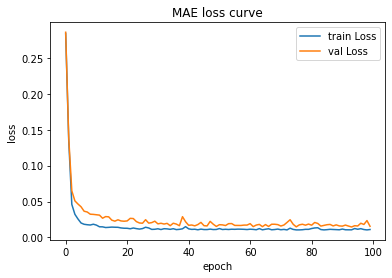

In [43]:
# display the loss curve 
plt.plot(model.history.history['loss'],label='train Loss')
plt.plot(model.history.history['val_loss'],label='val Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('MAE loss curve')
plt.legend()

# Transfer the normolized num


In [44]:
y_pred = model.predict(X_test)

scaler2 = MinMaxScaler(feature_range = (min_close, max_close))
y_pred_scaled = scaler2.fit_transform(y_pred)
y_test_scaled = scaler2.transform(y_test)

print(y_pred_scaled[:5])
print(y_test_scaled[:5])

[[265.98337]
 [270.14825]
 [267.51608]
 [267.56244]
 [271.51645]]
[[267.37196211]
 [265.04269845]
 [264.87342521]
 [268.71265658]
 [267.3245724 ]]


In [45]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# from keras.optimizers import  SGD , RMSprop

# display mae, mse score
r2 = r2_score(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2, mae, mse

(0.979376807556614, 0.015452827870387481, 0.003904338414615642)

Text(0, 0.5, 'close')

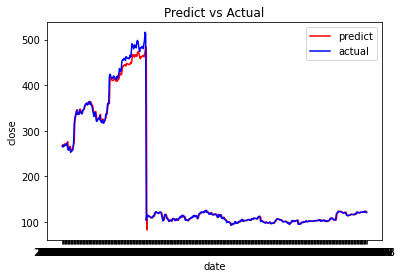

In [46]:
plt.plot(date_test, y_pred_scaled, color='r', label='predict')
plt.plot(date_test, y_test_scaled, color='b', label='actual')
plt.legend()

# predict and actual price display
plt.title('Predict vs Actual')
plt.xlabel('date')
plt.ylabel('close')